In [1]:
# Indian Food image Prediction Deep Learning model using CNN Multi-Classification 
# Date : 04-04-2024
# Author : Suman Das
# DataSet : Indian_Food

In [2]:
# Check tensorflow version 
import keras
import tensorflow as tf
print(f'Keras Version: {keras.__version__}')
print(f'Tensorflow Version: {tf.__version__}')

Keras Version: 2.10.0
Tensorflow Version: 2.10.0


In [3]:
# import libreries

In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Convolution2D

In [6]:
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from keras.layers import Flatten

In [9]:
from keras.layers import Dense

In [10]:
from keras.layers import MaxPooling2D

In [11]:
from keras.callbacks import ModelCheckpoint

In [12]:
# initializing CNN
classifier=Sequential()

In [13]:
# adding 1st convolution layer & polling layer

In [14]:
# classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
# adding 2nd convolution layer & polling layer

In [16]:
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
 # Flattening the layer

In [18]:
classifier.add(Flatten())

In [19]:
# Fully Connected layers

In [20]:
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))

In [21]:
# last Layer - Softmax layer with 5 neurons(classes)
classifier.add(Dense(units=5,activation='softmax'))

In [22]:
# compiling CNN
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
# fitting CNN to images

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255, #to rescale the image in range of [0,1]
                                 shear_range=0.2, #to randomly shear the images
                                 zoom_range=0.2, #to randomly zoom the images
                                 rotation_range = 15,
                                 brightness_range = [0.15, 1.15],
                                 width_shift_range = [-2,-1, 0, +1, +2],
                                 height_shift_range = [ -1, 0, +1],
                                 fill_mode = 'nearest',
                                 horizontal_flip=True) #for randomly flipping half of the images horrizontaly 

#train_datagen=ImageDataGenerator(rescale=1.0/255)

test_datagen=ImageDataGenerator(rescale=1.0/255)

In [25]:
# picking model with best accuracy
classifier_path='D:\CNN_Multiclassification_Indian_Food\model_Indianfood.h5'
checkpoint=ModelCheckpoint(classifier_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

In [26]:
print("\nTraining the data....\n")
train_data_path='D:/CNN_Multiclassification_Indian_Food/Train'
test_data_path='D:/CNN_Multiclassification_Indian_Food/Test'

training_set=train_datagen.flow_from_directory(train_data_path,
                                              target_size=(150,150),
                                              batch_size=12,
                                              class_mode='categorical')

test_set=test_datagen.flow_from_directory(test_data_path,
                                         target_size=(150,150),
                                         batch_size=12,
                                         class_mode='categorical')

history=classifier.fit(training_set,
                      epochs=30,
                      verbose=1,
                      validation_data=test_set,
                      callbacks=callbacks_list)


Training the data....

Found 2164 images belonging to 5 classes.
Found 520 images belonging to 5 classes.
Epoch 1/30
 10/181 [>.............................] - ETA: 47s - loss: 1.6387 - accuracy: 0.2417

C:\Users\suman\anaconda3\envs\tf\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


181/181 [==============================] - ETA: 0s - loss: 1.3417 - accuracy: 0.4367
Epoch 1: val_accuracy improved from -inf to 0.46154, saving model to D:\CNN_Multiclassification_Indian_Food\model_Indianfood.h5
181/181 [==============================] - 73s 400ms/step - loss: 1.3417 - accuracy: 0.4367 - val_loss: 1.2119 - val_accuracy: 0.4615
Epoch 2/30
181/181 [==============================] - ETA: 0s - loss: 1.1472 - accuracy: 0.5291
Epoch 2: val_accuracy improved from 0.46154 to 0.55962, saving model to D:\CNN_Multiclassification_Indian_Food\model_Indianfood.h5
181/181 [==============================] - 68s 374ms/step - loss: 1.1472 - accuracy: 0.5291 - val_loss: 1.2002 - val_accuracy: 0.5596
Epoch 3/30
181/181 [==============================] - ETA: 0s - loss: 1.0335 - accuracy: 0.5758
Epoch 3: val_accuracy improved from 0.55962 to 0.58269, saving model to D:\CNN_Multiclassification_Indian_Food\model_Indianfood.h5
181/181 [==============================] - 66s 364ms/step - loss:

In [27]:
training_set.class_indices

{'chai': 0, 'dhokla': 1, 'dosa': 2, 'jalebi': 3, 'naan': 4}

In [28]:
# save the model
#classifier.save("D:/Ducat/Data Analyst/python/Data Science/Deep Learning/model_Indianfood.h5")

In [29]:
#print(history.history['accuracy'])
#print(history.history['val_accuracy'])
#print(history.history['loss'])
#print(history.history['val_loss'])

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

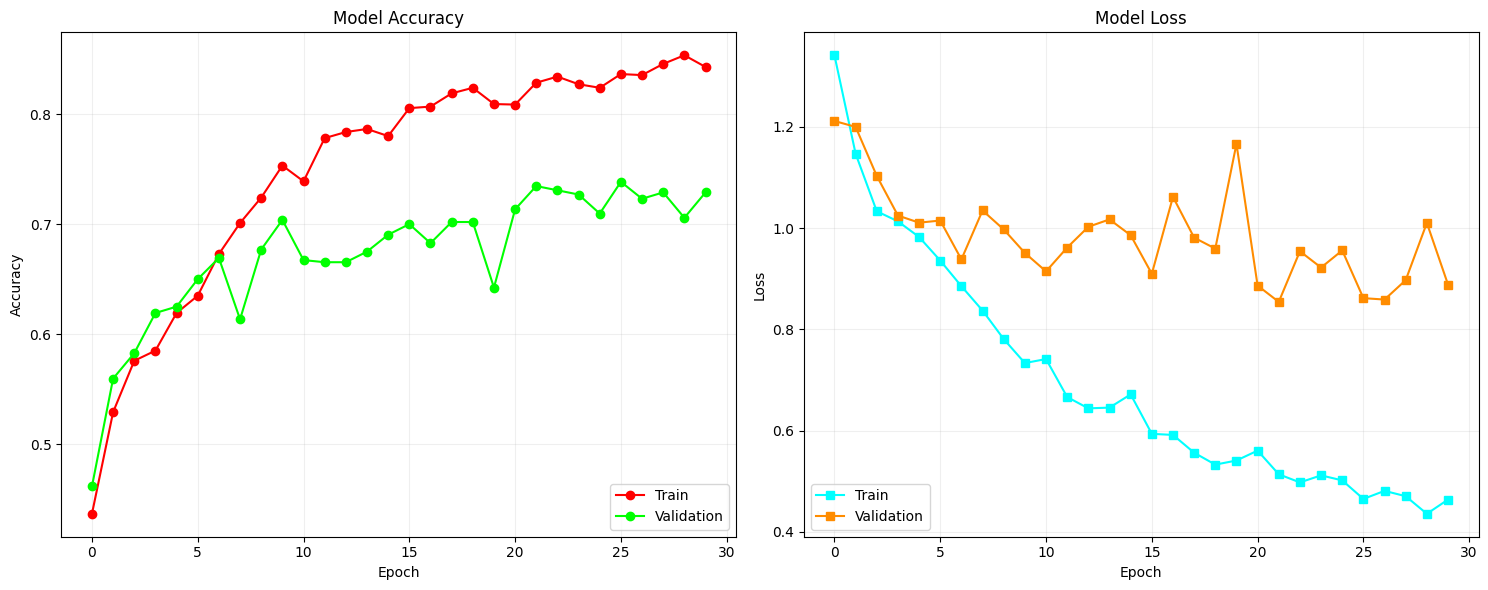

In [31]:
import seaborn as sns
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

# Plotting training and validation accuracy over epochs
ax[0].plot(history.history['accuracy'], marker='o', linestyle='-', color='red')
ax[0].plot(history.history['val_accuracy'], marker='o', linestyle='-', color='lime')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='lower right')
ax[0].grid(alpha=0.2)

# Plotting training and validation loss over epochs
ax[1].plot(history.history['loss'], marker='s', linestyle='-', color='cyan')
ax[1].plot(history.history['val_loss'], marker='s', linestyle='-', color='darkorange')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='lower left')
ax[1].grid(alpha=0.2)

plt.tight_layout()
plt.show()

In [32]:
# verify the model

In [33]:
from keras.preprocessing import image
from keras.models import load_model

new_model=load_model('D:/CNN_Multiclassification_Indian_Food/model_Indianfood.h5')

In [34]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [35]:
# validate the deep learning CNN model

In [36]:
import keras.utils as image
import numpy as np
import pandas as pd
food_item_classes=['chai','dhokla','dosa','jalebi','naan']

In [37]:
class clsPredictFoodItem():
    def __init__(self,foodimage):
        self.imgFoodImage=foodimage
    def FuncPredictItem(self):
        result=""
        result_final=""
        test_image=image.img_to_array(self.imgFoodImage)
        #test_image_new1=np.expand_dims(test_image1,axis=0)
        test_image=test_image.reshape(1,150,150,3)
        result=new_model.predict(test_image)
        result_final=result[0]

        for i in range(5):
            if result_final[i]==1:
                break
        prediction=food_item_classes[i]
        print(result_final)
        print("This food item is : ",prediction)

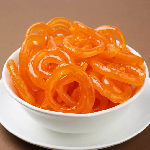

In [38]:
test_image1=image.load_img('D:/CNN_Multiclassification_Indian_Food/valid/1.png',
                         target_size=(150,150))
test_image1

In [39]:
objPrediction=clsPredictFoodItem(test_image1)
objPrediction.FuncPredictItem()

1/1 [==============================] - 0s 169ms/step
[0. 0. 0. 1. 0.]
This food item is :  jalebi


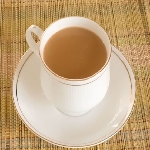

In [40]:
test_image3=image.load_img('D:/CNN_Multiclassification_Indian_Food/valid/3.png',
                         target_size=(150,150))
test_image3

In [41]:
objPrediction=clsPredictFoodItem(test_image3)
objPrediction.FuncPredictItem()

1/1 [==============================] - 0s 26ms/step
[1.0000000e+00 0.0000000e+00 1.3697063e-11 0.0000000e+00 0.0000000e+00]
This food item is :  chai


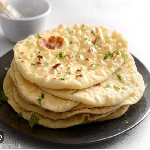

In [42]:
test_image4=image.load_img('D:/CNN_Multiclassification_Indian_Food/valid/4.png',
                         target_size=(150,150))
test_image4

In [43]:
objPrediction=clsPredictFoodItem(test_image4)
objPrediction.FuncPredictItem()

1/1 [==============================] - 0s 23ms/step
[0. 0. 0. 0. 1.]
This food item is :  naan


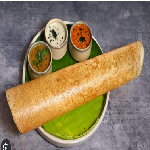

In [44]:
test_image5=image.load_img('D:/CNN_Multiclassification_Indian_Food/valid/5.png',
                         target_size=(150,150))
test_image5

In [45]:
objPrediction=clsPredictFoodItem(test_image5)
objPrediction.FuncPredictItem()

1/1 [==============================] - 0s 24ms/step
[0. 0. 1. 0. 0.]
This food item is :  dosa


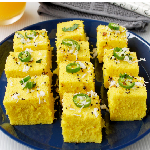

In [46]:
test_image2=image.load_img('D:/CNN_Multiclassification_Indian_Food/valid/2.png',
                         target_size=(150,150))
test_image2

In [47]:
objPrediction=clsPredictFoodItem(test_image2)
objPrediction.FuncPredictItem()

1/1 [==============================] - 0s 25ms/step
[0. 1. 0. 0. 0.]
This food item is :  dhokla
